This notebook is for testing pieces of code, exploring different packages, etc.

# Pandas DataFrames

In [ ]:
# make 3D plots interactive
use_interactive_plots = False
if use_interactive_plots:
    %matplotlib widget

In [39]:
import tables

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import matplotlib.ticker as ticker

## Load and save data (HDF5)

In [ ]:
# df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},

#                   index=['a', 'b', 'c'])  

df.to_hdf5("Data/data.h5", index=True)

In [ ]:
df_temp = pd.read_hdf('Data/data.h5', 'df')  

In [ ]:
df_temp

In [ ]:
file_path = "Data/W_tseries/test_alpha=0.01,h=0.2_dW_dR=0.h5"
W_tseries_copy.to_hdf(file_path, key='W_tseries', mode='w', index=True)

In [5]:
file_path = "Data/W_tseries/test_alpha=0.01,h=0.2_dW_dR=0.h5"
temp = pd.read_hdf(file_path, key='W_tseries', mode='r')

In [6]:
temp

,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,...,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5
0.0,0.001298+0.000000j,0.002792+0.000000j,0.004506+0.000000j,0.006448+0.000000j,0.008627+0.000000j,0.011046+0.000000j,0.013707+0.000000j,0.016604+0.000000j,0.019727+0.000000j,0.023059+0.000000j,...,0.068175+0.000000j,0.071297+0.000000j,0.074194+0.000000j,0.076855+0.000000j,0.079275+0.000000j,0.081453+0.000000j,0.083395+0.000000j,0.085109+0.000000j,0.086606+0.000000j,0.087899+0.000000j
0.2,0.001575+0.000000j,0.002798+0.000000j,0.004507+0.000000j,0.006433+0.000000j,0.008578+0.000000j,0.011001+0.000000j,0.013697+0.000000j,0.016606+0.000000j,0.019730+0.000000j,0.023063+0.000000j,...,0.068173+0.000000j,0.071294+0.000000j,0.074190+0.000000j,0.076850+0.000000j,0.079270+0.000000j,0.081449+0.000000j,0.083391+0.000000j,0.085105+0.000000j,0.086600+0.000000j,0.087659+0.000000j
0.4,0.001821+0.000000j,0.002822+0.000000j,0.004510+0.000000j,0.006389+0.000000j,0.008437+0.000000j,0.010866+0.000000j,0.013667+0.000000j,0.016612+0.000000j,0.019742+0.000000j,0.023074+0.000000j,...,0.068170+0.000000j,0.071283+0.000000j,0.074177+0.000000j,0.076836+0.000000j,0.079256+0.000000j,0.081434+0.000000j,0.083377+0.000000j,0.085091+0.000000j,0.086577+0.000000j,0.087444+0.000000j
0.6,0.002053+0.000000j,0.002873+0.000000j,0.004513+0.000000j,0.006314+0.000000j,0.008210+0.000000j,0.010644+0.000000j,0.013613+0.000000j,0.016621+0.000000j,0.019761+0.000000j,0.023094+0.000000j,...,0.068163+0.000000j,0.071266+0.000000j,0.074155+0.000000j,0.076813+0.000000j,0.079232+0.000000j,0.081411+0.000000j,0.083354+0.000000j,0.085069+0.000000j,0.086530+0.000000j,0.087239+0.000000j
0.8,0.002283+0.000000j,0.002955+0.000000j,0.004516+0.000000j,0.006209+0.000000j,0.007908+0.000000j,0.010340+0.000000j,0.013530+0.000000j,0.016630+0.000000j,0.019788+0.000000j,0.023121+0.000000j,...,0.068156+0.000000j,0.071242+0.000000j,0.074125+0.000000j,0.076780+0.000000j,0.079198+0.000000j,0.081378+0.000000j,0.083322+0.000000j,0.085037+0.000000j,0.086453+0.000000j,0.087033+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499.0,0.107658+0.000000j,0.107658+0.000000j,0.107285+0.000000j,0.107968+0.000000j,0.106837+0.000000j,0.108471+0.000000j,0.107161+0.000000j,0.107396+0.000000j,0.107865+0.000000j,0.106904+0.000000j,...,0.107394+0.000000j,0.107375+0.000000j,0.107970+0.000000j,0.106901+0.000000j,0.108220+0.000000j,0.106869+0.000000j,0.108033+0.000000j,0.107226+0.000000j,0.107622+0.000000j,0.107622+0.000000j
2499.2,0.107634+0.000000j,0.107634+0.000000j,0.107345+0.000000j,0.107872+0.000000j,0.106940+0.000000j,0.108584+0.000000j,0.106631+0.000000j,0.108178+0.000000j,0.107078+0.000000j,0.107612+0.000000j,...,0.107123+0.000000j,0.107736+0.000000j,0.107547+0.000000j,0.107331+0.000000j,0.107815+0.000000j,0.107182+0.000000j,0.107804+0.000000j,0.107344+0.000000j,0.107572+0.000000j,0.107572+0.000000j
2499.4,0.107600+0.000000j,0.107600+0.000000j,0.107437+0.000000j,0.107726+0.000000j,0.107139+0.000000j,0.108532+0.000000j,0.106250+0.000000j,0.108854+0.000000j,0.106355+0.000000j,0.108308+0.000000j,...,0.106919+0.000000j,0.108066+0.000000j,0.107123+0.000000j,0.107790+0.000000j,0.107366+0.000000j,0.107544+0.000000j,0.107532+0.000000j,0.107490+0.000000j,0.107513+0.000000j,0.107513+0.000000j
2499.6,0.107559+0.000000j,0.107559+0.000000j,0.107545+0.000000j,0.107550+0.000000j,0.107408+0.000000j,0.108322+0.000000j,0.106071+0.000000j,0.109327+0.000000j,0.105809+0.000000j,0.108886+0.000000j,...,0.106815+0.000000j,0.108314+0.000000j,0.106762+0.000000j,0.108206+0.000000j,0.106939+0.000000j,0.107900+0.000000j,0.107258+0.000000j,0.107638+0.000000j,0.107454+0.000000j,0.107454+0.000000j


## Load and save data (csv)

In [ ]:
W_tseries = pd.read_csv("Data/W_tseries/alpha=0.01,h=0.2_dW_dR=0.csv", index_col=0)
W_tseries_copy = W_tseries.copy(deep=True)

In [ ]:
W_tseries_copy.columns = np.asarray(W_tseries_copy.columns, dtype=float)

In [ ]:
for i in W_tseries_copy.index:
    W_tseries_copy.loc[i].values = np.asarray(W_tseries_copy.loc[i], dtype=complex)

In [ ]:
W_tseries_copy = W_tseries_copy.astype(complex)

## Inserting a row

[Link](https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe)

In [ ]:
s1 = pd.Series([5, 6, 7])
s2 = pd.Series([7, 8, 9])
cols = np.array((0.5, 1, 1.5))


df = pd.DataFrame([list(s1), list(s2)], columns = cols)
df

In [ ]:
df.loc[-1] = np.array([2, 3, 4]) # adding a row
df = df.sort_index()  # sorting by index
df

In [ ]:
for t in df.index: # look at each time snapshot
    print(t)
    print(df.loc[t].index) # gets the x-axis (eg radius domain)
    print(df.loc[t].values) # gets the y-axis (eg warp values)

In [ ]:
df = pd.DataFrame(data=np.array([[2+1j, 3+1j, 4+1j]]), index=np.array([1.1]), columns=[0.5, 1.5, 2])
# df.loc[-1] = np.array([2+1j, 3+1j, 4+1j]) # adding a row
df

## Saving a DataFrame
[Link](https://stackoverflow.com/questions/17098654/how-to-reversibly-store-and-load-a-pandas-dataframe-to-from-disk)

In [ ]:
file_path = "Data/test_a=0.01,h=0.2_test.csv"
df_temp.to_csv(file_path, index=False)  

df = pd.read_csv(file_path)

## Plotting 2D plots in different planes
[Link](https://matplotlib.org/stable/gallery/mplot3d/bars3d.html)

In [ ]:
ts = np.array([1,2,3,4])

df = pd.DataFrame(data=np.array([[2,3,4],[3,4,5],[4,5,6],[7,8,9]]), index=ts, columns = [0.5, 1, 1.5])
df

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ts = df.index
Rs = df.columns

for t in ts:
    # Generate the random data for the y=k 'layer'.
    Ws = df.loc[t].values

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.plot(Rs, Ws, zs=t, zdir='y', color="black", alpha=0.8)

ax.set_xlabel('R')
ax.set_ylabel('t')
ax.set_zlabel(r'$\mathcal{W}$')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(df.index)

plt.show()

# Ridge plots
[Matplotlib tutorial](https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/)

In [10]:
W_tseries = temp.copy(deep=True)

In [ ]:
np.asarray(W_tseries.loc[0].values, dtype=complex)

In [ ]:
np.asarray(R_axis.values, dtype=float)

In [8]:
import sys
sys.getsizeof(W_tseries_copy.loc[0])
#sys.getsizeof(np.asarray(W_tseries.loc[0].values, dtype=complex))

1848

In [ ]:
plt.plot(R_axis.values, W_tseries.loc[0].values.real)

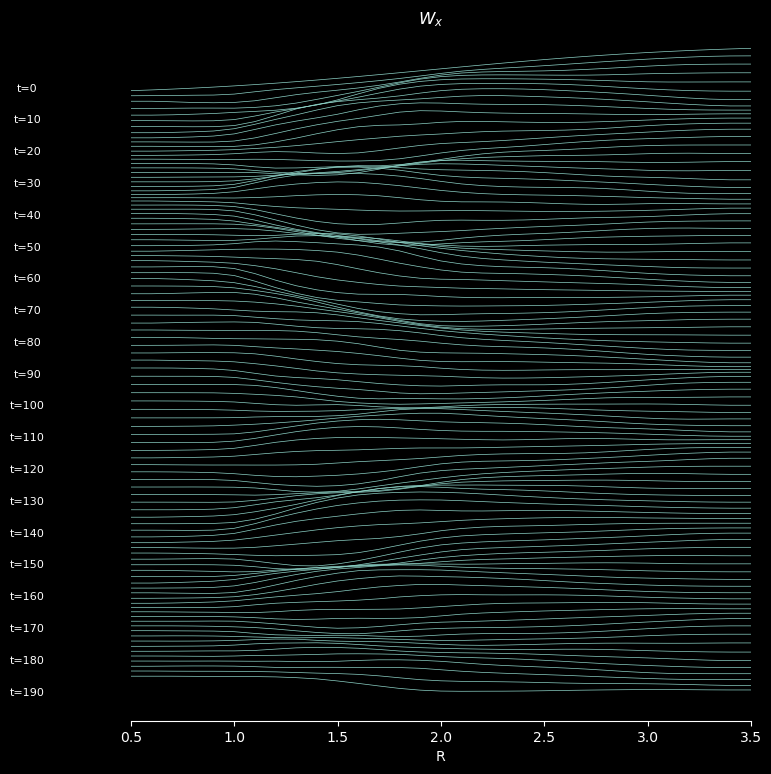

In [79]:
plt.style.use('dark_background')

R_axis = W_tseries.columns
t_axis = np.arange(0, 200, step=2)

gs = (grid_spec.GridSpec(len(t_axis), 1))
fig = plt.figure(figsize=(8,9))

# empty list of axis objects
ax_objs = []

i = 0
for t in t_axis:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1])) # oldest snapshots at top

    # make plot
    W_vals = W_tseries.loc[t].values.real
    ax_objs[-1].plot(R_axis, W_vals, lw=0.5)

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0.5, 3.5)
    ax_objs[-1].set_ylim(0,.13)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].axis('off')
    ax_objs[-1].set_yticklabels([])
    #ax_objs[-1].set_ylabel('')

    # label timepoint
    if (t % 10 == 0):
        ax_objs[-1].text(0,0,"t=" + str(t),fontsize=8,ha="center")

    i += 1

ax_objs[-1].axis('on')
ax_objs[-1].spines['top'].set_visible(False)
ax_objs[-1].spines['right'].set_visible(False)
ax_objs[-1].spines['bottom'].set_visible(True)
ax_objs[-1].spines['left'].set_visible(False)
ax_objs[-1].get_yaxis().set_visible(False)

ax_objs[-1].set_xlabel('R')
ax_objs[-1].set_ylabel('Tilt')
gs.update(hspace=-.9)
# plt.ylabel("Tilt")
plt.suptitle(r"$W_x$", y=0.9)

#plt.tight_layout()
plt.show()